In [26]:
import pandas as pd
import os
import sqlite3
import datetime

%matplotlib inline
import matplotlib as mpl # pie chart
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [3]:
directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Tools

In [9]:
def pid_count(df, *the_rest):
    def _cal(df):
        return len(df.drop_duplicates('pid'))
    print(*list(map(_cal, [df]+list(the_rest))), sep=', ')

In [18]:
def pie(labbels, sizes):
    mpl.rcParams['font.size'] = 12.0
    num = len(sizes)
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'cornflowerblue'][:num]
    # explode 1st slice
    explode = (0.1, 0, 0, 0, 0, 0, 0)[:num]  
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

In [50]:
def show_NaN(df):
    count = 0
    for i in df.columns.values.tolist():
        while df[i].isnull().values.any(): count+=1; print(i); break

In [179]:
def save_db(db_name, df_name, *path):
    if len(path) == 1:
        conn_save = sqlite3.connect(directory + path[0] + db_name + '.db')
    else:
        conn_save = sqlite3.connect(directory + '/dataPrep/source/' + db_name + '.db')
    df_name.to_sql(name=db_name, con=conn_save, if_exists='replace', index=False)

In [217]:
def describe_table(df):
    table = df.groupby('proj_category').mean()[['proj_backer_count']].rename(
    columns={'proj_backer_count': 'Mean'}).reset_index().merge(
    df.groupby('proj_category').min()[['proj_backer_count']].rename(
        columns={'proj_backer_count': 'Min'}).reset_index(), 
    on=['proj_category']).merge(
    df.groupby('proj_category').quantile(.25)[['proj_backer_count']].rename(
        columns={'proj_backer_count': 'Q1'}).reset_index(), 
    on=['proj_category']).merge(
    df.groupby('proj_category').quantile(.5)[['proj_backer_count']].rename(
        columns={'proj_backer_count': 'Q2'}).reset_index(), 
    on=['proj_category']).merge(
    df.groupby('proj_category').quantile(.75)[['proj_backer_count']].rename(
        columns={'proj_backer_count': 'Q3'}).reset_index(),
    on=['proj_category']).merge(    
    df.groupby('proj_category').max()[['proj_backer_count']].rename(
        columns={'proj_backer_count': 'Max'}).reset_index(), 
    on=['proj_category']).merge(
    df.groupby('proj_category').count()[['pid']].rename(
        columns={'pid': 'Total'}).reset_index(), on=['proj_category'])
    return table

# Data

In [5]:
conn_all_date_year = sqlite3.connect(directory + '/dataPrep/source/overall/' + 'all_date_year.db')
all_date_year = pd.read_sql_query("SELECT * FROM all_date_year", conn_all_date_year)

In [193]:
conn_proj = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'proj.db')
conn_rew = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'rew.db')
conn_faq = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'faq.db')
conn_upd = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'upd.db')
conn_cmt = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'cmt.db')

proj = pd.read_sql_query("SELECT * FROM proj", conn_proj)
rew = pd.read_sql_query("SELECT * FROM rew", conn_rew)
faq = pd.read_sql_query("SELECT * FROM faq", conn_faq)
upd = pd.read_sql_query("SELECT * FROM upd", conn_upd)
cmt = pd.read_sql_query("SELECT * FROM cmt", conn_cmt)

In [28]:
conn_first_last_date = sqlite3.connect(directory + '/dataPrep/source/overall/' + 'first_last_date.db')
first_last_date = pd.read_sql_query("SELECT * FROM first_last_date", conn_first_last_date)

In [46]:
conn_cmt_all = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'cmt_all.db')
conn_cmt_year = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'cmt_year.db')
conn_cmt_pre = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'cmt_pre.db')

cmt_all = pd.read_sql_query("SELECT * FROM cmt_all", conn_cmt_all)
cmt_year = pd.read_sql_query("SELECT * FROM cmt_year", conn_cmt_year)
cmt_pre = pd.read_sql_query("SELECT * FROM cmt_pre", conn_cmt_pre)

In [47]:
conn_faq_all = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'faq_all.db')
conn_faq_year = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'faq_year.db')
conn_faq_pre = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'faq_pre.db')

faq_all = pd.read_sql_query("SELECT * FROM faq_all", conn_faq_all)
faq_year = pd.read_sql_query("SELECT * FROM faq_year", conn_faq_year)
faq_pre = pd.read_sql_query("SELECT * FROM faq_pre", conn_faq_pre)

In [48]:
conn_upd_all = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'upd_all.db')
conn_upd_year = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'upd_year.db')
conn_upd_pre = sqlite3.connect(directory + '/dataPrep/source/ds_ind_26229/' + 'upd_pre.db')

upd_all = pd.read_sql_query("SELECT * FROM upd_all", conn_upd_all)
upd_year = pd.read_sql_query("SELECT * FROM upd_year", conn_upd_year)
upd_pre = pd.read_sql_query("SELECT * FROM upd_pre", conn_upd_pre)

#### not all projects have faq, update, and comment

In [10]:
pid_count(all_date_year, proj, rew, faq, upd, cmt)

26229, 26229, 26229, 6319, 24148, 20029


# the numver of comments in projects which estimated delivery date between 2015-07-01 and 2016-06-31

But these comments are not only posted by backers ....

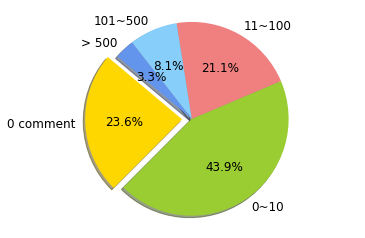

In [19]:
labels = '0 comment', '0~10', '11~100', '101~500', '> 500'
sizes = [proj.query("proj_comment_count == 0").pid.agg('count'), 
         proj.query("proj_comment_count > 0 and proj_comment_count <= 10").pid.agg('count'),
         proj.query("proj_comment_count > 10 and proj_comment_count <= 100").pid.agg('count'),
         proj.query("proj_comment_count > 100 and proj_comment_count <= 500").pid.agg('count'),
         proj.query("proj_comment_count > 500").pid.agg('count')
        ]
pie(labels, sizes)

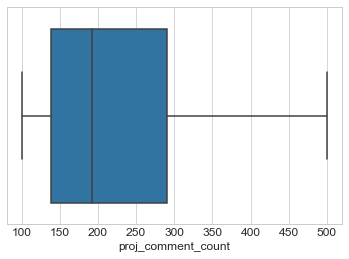

In [20]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="proj_comment_count", data=proj.query("proj_comment_count > 100 and proj_comment_count <= 500"))

# Comments

In [49]:
cmt_num = pd.DataFrame({'cmt_all': cmt_all.groupby('pid').count().cmt_content})
cmt_num['cmt_year'] = cmt_year.groupby('pid').count().cmt_content
cmt_num['cmt_pre'] = cmt_pre.groupby('pid').count().cmt_content

In [51]:
show_NaN(cmt_num)

cmt_year
cmt_pre


In [52]:
cmt_num = cmt_num.fillna(0)

In [53]:
all_proj_count = proj.pid.drop_duplicates().count() # 26,229
all_cmt_pid_count = cmt_all.pid.drop_duplicates().count() # 19,999
all_no_comment_count = all_proj_count - all_cmt_pid_count # 6,230

after_d_cmt_pid_count = cmt_year.pid.drop_duplicates().count() # 11,042
after_d_no_comment_count = all_cmt_pid_count - after_d_cmt_pid_count # 8,957

before_d_cmt_pid_count = cmt_pre.pid.drop_duplicates().count() # 18,810
before_d_no_comment_count = all_cmt_pid_count - before_d_cmt_pid_count # 1,189

There are 26229 projects in total but 6230 projects are no comments.
Namely, only 19999 (76.248%) projects have comments.
We can assume those 6230 projects are successful or small projects.


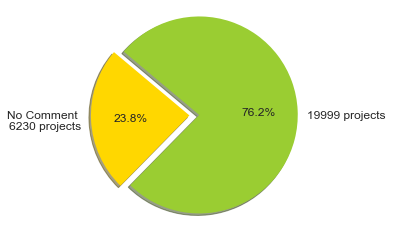

In [109]:
print('There are {} projects in total but {} projects are no comments.'.format(all_proj_count, all_no_comment_count))
print('Namely, only {} ({}%) projects have comments.'.format(all_cmt_pid_count, 
                                                             round(all_cmt_pid_count* 100 / all_proj_count, 3)))
print('We can assume those {} projects are successful or small projects.'.format(all_no_comment_count))
# proj[~proj.pid.isin(cmt_all.pid.drop_duplicates())][:5][proj_index]

labels = 'No Comment \n{} projects'.format(all_no_comment_count), '\n{} projects'.format(all_cmt_pid_count)
sizes = [all_no_comment_count, all_cmt_pid_count]
pie(labels, sizes)

In 19999 projects, 8957 projects are no comments after their last delivery date.
Namely, only 11042 (55.213%; 42.098%) projects have comments after the last delivery date.
We can assume those 8957 projects are successful projects bacuse they have no comment afterwards.


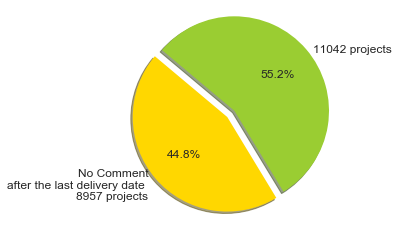

In [108]:
print('In {} projects, {} projects are no comments after their last delivery date.'.format(
    all_cmt_pid_count, after_d_no_comment_count))
print('Namely, only {} ({}%; {}%) projects have comments after the last delivery date.'.format(
    after_d_cmt_pid_count, round(after_d_cmt_pid_count*100 / all_cmt_pid_count, 3), 
    round(after_d_cmt_pid_count*100 / all_proj_count, 3)))
print('We can assume those {} projects are successful projects bacuse they have no comment afterwards.'.format(
    after_d_no_comment_count))

labels = 'No Comment\nafter the last delivery date \n{} projects'.format(
    after_d_no_comment_count), ' \n{} projects'.format(after_d_cmt_pid_count)
sizes = [after_d_no_comment_count, after_d_cmt_pid_count]
pie(labels, sizes)

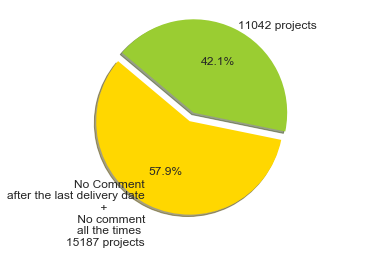

In [107]:
labels = 'No Comment\nafter the last delivery date\n +           \n No comment\nall the times \n{} projects'.format(
    after_d_no_comment_count+all_no_comment_count), ' \n{} projects'.format(after_d_cmt_pid_count); 
sizes = [after_d_no_comment_count+all_no_comment_count, after_d_cmt_pid_count]; pie(labels, sizes)

# FAQs

In [68]:
all_faq_pid_count = faq_all.pid.drop_duplicates().count() # 6,319, not all projects have faqs
all_no_faq_count = all_proj_count - all_faq_pid_count # 19,910

after_d_faq_pid_count = faq_year.pid.drop_duplicates().count() # 104
after_d_no_faq_count = all_faq_pid_count - after_d_faq_pid_count # 6,215

before_d_faq_pid_count = faq_pre.pid.drop_duplicates().count() # 6,272
before_d_no_faq_count = all_faq_pid_count - before_d_faq_pid_count # 47

#### All FAQs (from start fundraising to one year after the last delivery date) (n=26,229)

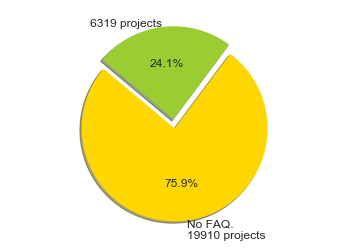

In [106]:
labels = 'No FAQ. \n{} projects'.format(all_no_faq_count), ' \n{} projects'.format(all_faq_pid_count); 
sizes = [all_no_faq_count, all_faq_pid_count]
pie(labels, sizes)

#### FAQs from the last delivery date to the date after one year

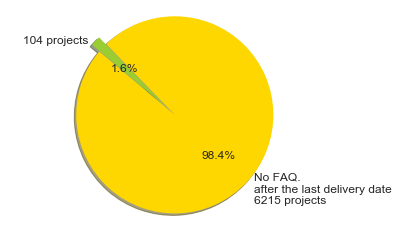

In [105]:
labels = 'No FAQ.\nafter the last delivery date \n{} projects'.format(
    after_d_no_faq_count), ' \n{} projects'.format(after_d_faq_pid_count)
sizes = [after_d_no_faq_count, after_d_faq_pid_count]
pie(labels, sizes)

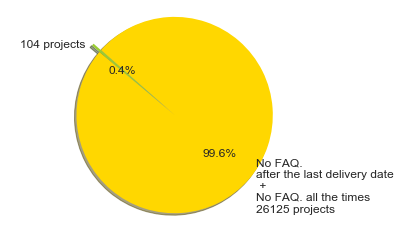

In [104]:
labels = 'No FAQ.\nafter the last delivery date\n + \nNo FAQ. all the times \n{} projects'.format(
    after_d_no_faq_count + all_no_faq_count), ' \n{} projects'.format(after_d_faq_pid_count)
sizes = [after_d_no_faq_count + all_no_faq_count, after_d_faq_pid_count]
pie(labels, sizes)

#### FAQs before the delivery date

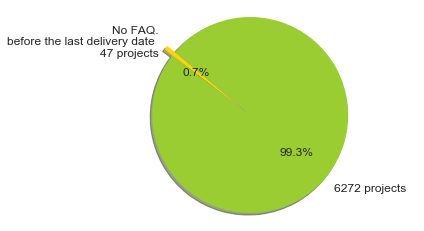

In [103]:
labels = 'No FAQ.\nbefore the last delivery date \n{} projects'.format(
    before_d_no_faq_count), ' \n{} projects'.format(before_d_faq_pid_count); 
sizes = [before_d_no_faq_count, before_d_faq_pid_count]
pie(labels, sizes)

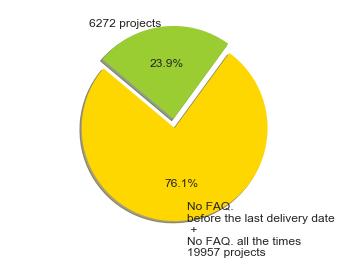

In [102]:
labels = 'No FAQ.\nbefore the last delivery date\n + \nNo FAQ. all the times \n{} projects'.format(
    before_d_no_faq_count + all_no_faq_count), ' \n{} projects'.format(before_d_faq_pid_count)
sizes = [before_d_no_faq_count + all_no_faq_count, before_d_faq_pid_count]
pie(labels, sizes)

# Updates (n=24,148)

In [69]:
all_upd_pid_count = upd_all.pid.drop_duplicates().count() # 24,148, not all projects have updates
all_no_upd_count = all_proj_count - all_upd_pid_count # 2,081
after_d_upd_pid_count = upd_year.pid.drop_duplicates().count() # 16,891
after_d_no_upd_count = all_upd_pid_count - after_d_upd_pid_count # 7,527
before_d_upd_pid_count = upd_pre.pid.drop_duplicates().count() # 24,020
before_d_no_upd_count = all_upd_pid_count - before_d_upd_pid_count # 128

#### All Updates (from start fundraising to one year after the last delivery date)

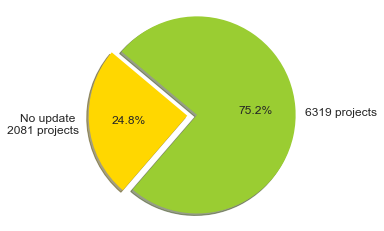

In [111]:
labels = 'No update \n{} projects'.format(all_no_upd_count), ' \n{} projects'.format(all_faq_pid_count)
sizes = [all_no_upd_count, all_faq_pid_count]
pie(labels, sizes)

#### Updates from the last delivery date to the date after one year

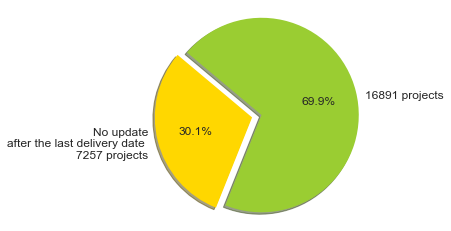

In [113]:
labels = 'No update\nafter the last delivery date \n{} projects'.format(
    after_d_no_upd_count), ' \n{} projects'.format(after_d_upd_pid_count)
sizes = [after_d_no_upd_count, after_d_upd_pid_count]
pie(labels, sizes)

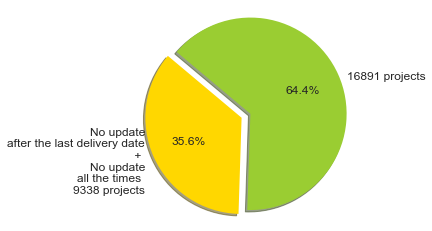

In [117]:
labels = 'No update\nafter the last delivery date\n + \nNo update\nall the times \n{} projects'.format(
    after_d_no_upd_count + all_no_upd_count), ' \n{} projects'.format(after_d_upd_pid_count)
sizes = [after_d_no_upd_count + all_no_upd_count, after_d_upd_pid_count]
pie(labels, sizes)

#### Updates before the delivery date

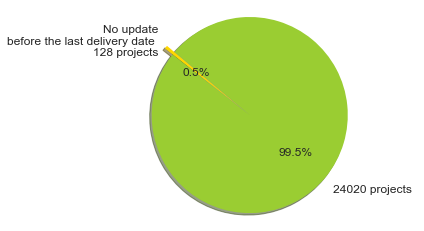

In [115]:
labels = 'No update\nbefore the last delivery date \n{} projects'.format(
    before_d_no_upd_count), ' \n{} projects'.format(before_d_upd_pid_count)
sizes = [before_d_no_upd_count, before_d_upd_pid_count]
pie(labels, sizes)

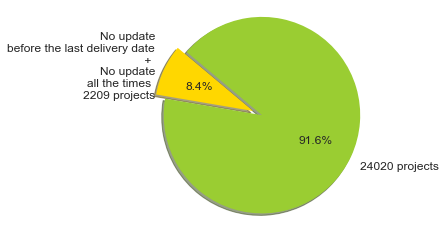

In [116]:
labels = 'No update\nbefore the last delivery date\n + \nNo update\nall the times \n{} projects'.format(
    before_d_no_upd_count + all_no_upd_count), ' \n{} projects'.format(before_d_upd_pid_count)
sizes = [before_d_no_upd_count + all_no_upd_count, before_d_upd_pid_count]
pie(labels, sizes)

# Backer Count

In [218]:
describe_table(proj)

,proj_category,Mean,Min,Q1,Q2,Q3,Max,Total
0,art,106.030194,1.0,22.00,45.0,98.00,7663.0,1954
1,comics,230.397093,1.0,47.00,98.0,215.00,7119.0,1307
2,crafts,91.062837,1.0,17.00,38.0,93.00,1203.0,557
3,dance,70.880223,1.0,28.00,48.0,85.00,863.0,359
4,design,631.510239,1.0,65.00,163.0,455.75,78471.0,2344
5,fashion,240.359836,1.0,38.00,89.0,191.00,13642.0,1220
6,film & video,209.717241,1.0,27.00,66.0,163.00,48270.0,4205
7,food,222.149442,1.0,45.00,103.0,200.00,13116.0,1345
8,games,846.469849,1.0,84.00,227.5,635.00,219382.0,2786
9,journalism,157.563433,1.0,27.75,66.0,185.75,1951.0,268


In [271]:
proj_cmt_year = proj[proj.pid.isin(cmt_year.pid)].copy()

In [272]:
describe_table(proj_cmt_year)

,proj_category,Mean,Min,Q1,Q2,Q3,Max,Total
0,art,221.548571,2.0,34.00,79.0,201.00,7663.0,525
1,comics,337.181208,3.0,79.00,154.0,328.00,7119.0,745
2,crafts,122.373333,1.0,21.75,47.0,138.50,1203.0,300
3,dance,84.956522,19.0,46.25,65.0,94.50,347.0,46
4,design,788.709928,4.0,95.00,228.0,632.00,78471.0,1803
5,fashion,376.592085,2.0,71.00,143.0,321.00,13642.0,657
6,film & video,552.668233,1.0,80.75,205.5,467.25,48270.0,1064
7,food,425.132035,2.0,77.50,172.0,324.00,13116.0,462
8,games,1022.463839,1.0,126.00,307.0,780.00,219382.0,2240
9,journalism,339.568966,6.0,67.00,220.0,481.75,1951.0,58


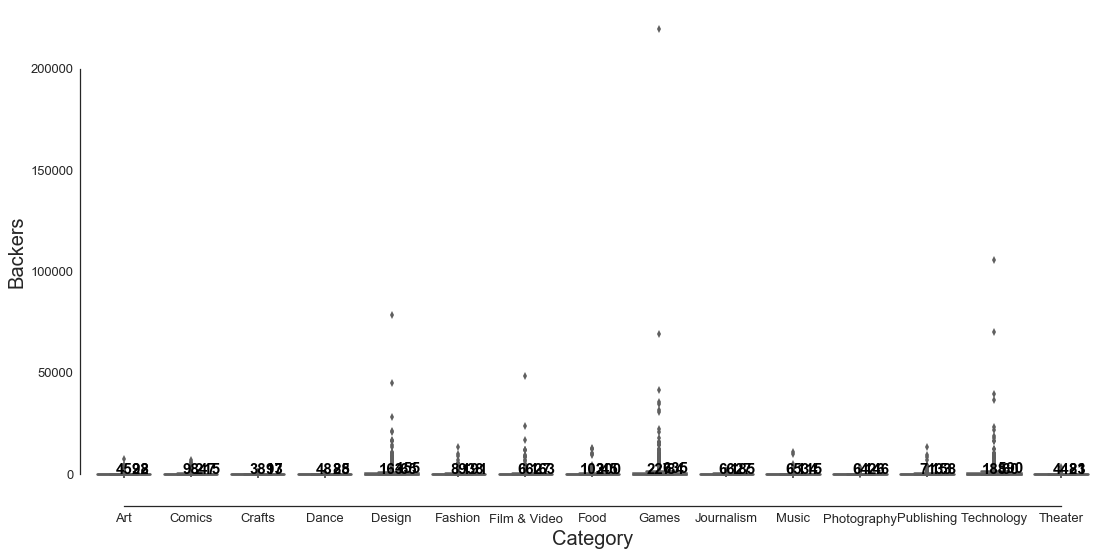

In [196]:
boxplot_data = proj.sort_values(by='proj_category').copy()
boxplot_data.proj_category = boxplot_data.proj_category.apply(
    lambda c: c.capitalize().replace('%20', ' '))
boxplot_data.proj_category = boxplot_data.proj_category.apply(
    lambda c: c.replace('& v', '& V'))

sns.set(style="ticks")
# Draw a nested boxplot to show bills by day and sex
f, ax = plt.subplots(figsize=(18, 9))

sns.set(font_scale=1.3)
sns.boxplot(x='proj_category', y='proj_backer_count', data=boxplot_data, 
            showfliers=True, fliersize=5, palette="Set3", linewidth=2.5)

ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Backers', fontsize=20)
sns.despine(offset=10, trim=True)

Q1 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.25).values.astype(int)
Q2 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.5).values.astype(int)
Q3 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.75).values.astype(int)
Q1_labels = ['        ' + str(np.round(s, 2)) for s in Q1]
Q2_labels = [str(np.round(s, 2)) for s in Q2]
Q3_labels = ['        ' + str(np.round(s, 2)) for s in Q3]

pos = range(len(Q2))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick] , Q1[tick] - 35, Q1_labels[tick], fontsize=15, 
            horizontalalignment='center', color='k', weight='semibold')
    ax.text(pos[tick], Q2[tick] + 5, Q2_labels[tick], fontsize=15, 
            horizontalalignment='center', color='k', weight='semibold')
    ax.text(pos[tick] , Q3[tick] + 5, Q3_labels[tick], fontsize=15, 
            horizontalalignment='center', color='k', weight='semibold')

# Eliminate Outliers

In [219]:
cal_IQR = describe_table(proj)

In [220]:
cal_IQR['IQR'] = cal_IQR.Q3 - cal_IQR.Q1
cal_IQR['upperBound'] = cal_IQR.Q3 + cal_IQR.IQR*1.5
cal_IQR = cal_IQR[['proj_category', 'Mean', 'Min', 'Q1', 'Q2', 'Q3', 'Max', 'IQR', 'upperBound', 'Total']]

In [221]:
cal_IQR

,proj_category,Mean,Min,Q1,Q2,Q3,Max,IQR,upperBound,Total
0,art,106.030194,1.0,22.00,45.0,98.00,7663.0,76.00,212.000,1954
1,comics,230.397093,1.0,47.00,98.0,215.00,7119.0,168.00,467.000,1307
2,crafts,91.062837,1.0,17.00,38.0,93.00,1203.0,76.00,207.000,557
3,dance,70.880223,1.0,28.00,48.0,85.00,863.0,57.00,170.500,359
4,design,631.510239,1.0,65.00,163.0,455.75,78471.0,390.75,1041.875,2344
5,fashion,240.359836,1.0,38.00,89.0,191.00,13642.0,153.00,420.500,1220
6,film & video,209.717241,1.0,27.00,66.0,163.00,48270.0,136.00,367.000,4205
7,food,222.149442,1.0,45.00,103.0,200.00,13116.0,155.00,432.500,1345
8,games,846.469849,1.0,84.00,227.5,635.00,219382.0,551.00,1461.500,2786
9,journalism,157.563433,1.0,27.75,66.0,185.75,1951.0,158.00,422.750,268


In [229]:
proj_rmO = proj[['pid', 'proj_category', 'proj_backer_count']].merge(
    cal_IQR[['proj_category', 'upperBound']], on=['proj_category'])
proj_rmO = proj_rmO[proj_rmO.proj_backer_count < proj_rmO.upperBound]

In [230]:
table_proj_rmO = describe_table(proj_rmO)

In [231]:
table_proj_rmO

,proj_category,Mean,Min,Q1,Q2,Q3,Max,Total
0,art,53.898633,1.0,20.00,39.0,75.00,211.0,1756
1,comics,119.355802,1.0,42.00,83.0,160.00,466.0,1172
2,crafts,48.091093,1.0,15.00,31.0,63.00,203.0,494
3,dance,55.685460,1.0,27.00,46.0,75.00,163.0,337
4,design,216.880292,1.0,56.00,129.0,286.00,1041.0,2055
5,fashion,103.710599,1.0,33.00,77.0,147.00,406.0,1085
6,film & video,86.301138,1.0,24.00,55.0,122.00,365.0,3779
7,food,119.084135,1.0,42.75,91.0,172.25,431.0,1248
8,games,309.764398,1.0,74.00,184.0,439.00,1457.0,2483
9,journalism,93.115226,1.0,24.00,50.0,128.50,402.0,243


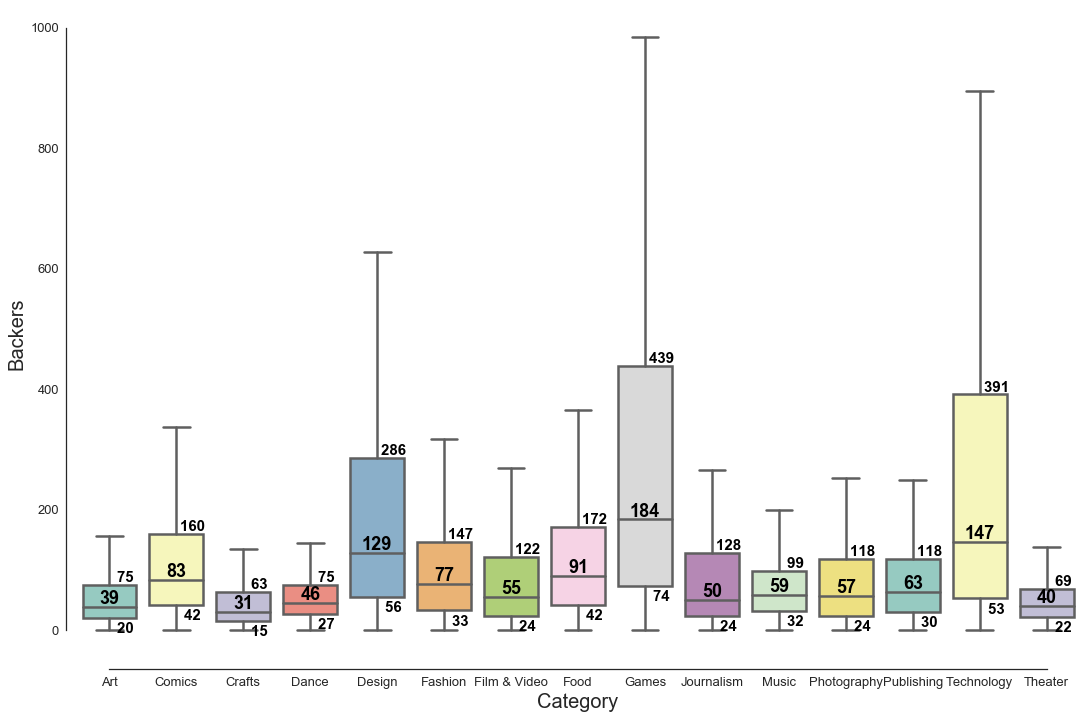

In [202]:
boxplot_data = proj_rm_outlier.sort_values(by='proj_category').copy()
boxplot_data.proj_category = boxplot_data.proj_category.apply(
    lambda c: c.capitalize().replace('%20', ' '))
boxplot_data.proj_category = boxplot_data.proj_category.apply(
    lambda c: c.replace('& v', '& V'))

sns.set(style="ticks")
# Draw a nested boxplot to show bills by day and sex
f, ax = plt.subplots(figsize=(18, 12))
sns.set(font_scale=1.3)
sns.boxplot(x='proj_category', y='proj_backer_count', data=boxplot_data, showfliers=False, palette="Set3", linewidth=2.5)

ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Backers', fontsize=20)
sns.despine(offset=10, trim=True)

Q1 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.25).values.astype(int)
Q2 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.5).values.astype(int)
Q3 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.75).values.astype(int)
Q1_labels = ['        ' + str(np.round(s, 2)) for s in Q1]
Q2_labels = [str(np.round(s, 2)) for s in Q2]
Q3_labels = ['        ' + str(np.round(s, 2)) for s in Q3]

pos = range(len(Q2))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick] , Q1[tick] - 25, Q1_labels[tick], fontsize=15, 
            horizontalalignment='center', color='k', weight='semibold')
    ax.text(pos[tick], Q2[tick] + 5, Q2_labels[tick], fontsize=18, 
            horizontalalignment='center', color='k', weight='semibold')
    ax.text(pos[tick] , Q3[tick] + 5, Q3_labels[tick], fontsize=15, 
            horizontalalignment='center', color='k', weight='semibold')

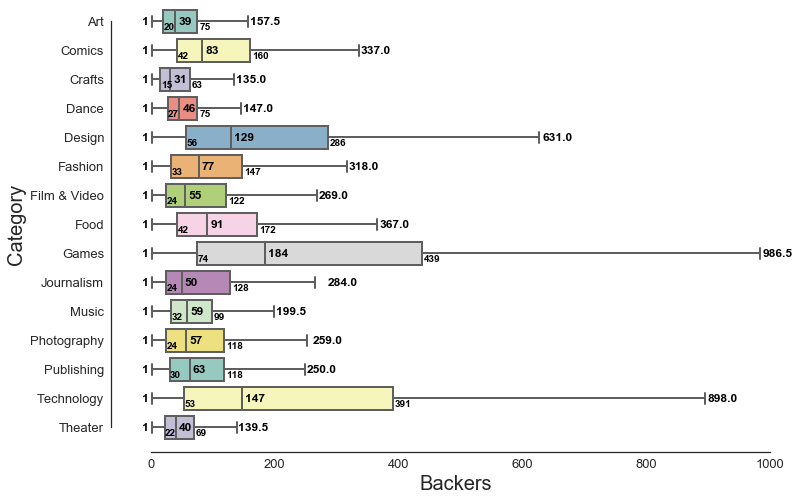

In [203]:
boxplot_data = proj_rm_outlier.sort_values(by='proj_category').copy()
boxplot_data.proj_category = boxplot_data.proj_category.apply(
    lambda c: c.capitalize().replace('%20', ' '))
boxplot_data.proj_category = boxplot_data.proj_category.apply(
    lambda c: c.replace('& v', '& V'))

sns.set(style="ticks")
# Draw a nested boxplot to show bills by day and sex
f, ax = plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.3)
sns.boxplot(y='proj_category', x='proj_backer_count', orient='h', data=boxplot_data, showfliers=False, palette="Set3", linewidth=2)

ax.set_ylabel('Category', fontsize=20)
ax.set_xlabel('Backers', fontsize=20)
sns.despine(offset=10, trim=True)

Min = boxplot_data.groupby(['proj_category'])['proj_backer_count'].min().values.astype(int)
Q1 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.25).values.astype(int)
Q2 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.5).values.astype(int)
Q3 = boxplot_data.groupby(['proj_category'])['proj_backer_count'].quantile(.75).values.astype(int)
Max = Q3+(Q3-Q1)*1.5

Min_labels = [str(np.round(s, 2)) for s in Min]
Q1_labels = [str(np.round(s, 2)) for s in Q1]
Q2_labels = [str(np.round(s, 2)) for s in Q2]
Q3_labels = [str(np.round(s, 2)) for s in Q3]
Max_labels = [str(np.round(s, 2)) for s in Max]

pos = range(len(Q2))
for tick,label in zip(pos, ax.get_yticklabels()):
    ax.text(Min[tick] - 15, pos[tick], Min_labels[tick], fontsize=12, 
            verticalalignment='center', color='k', weight='semibold')
    ax.text(Q1[tick] + 1, pos[tick] +0.2, Q1_labels[tick], fontsize=10, 
            verticalalignment='center', color='k', weight='semibold')
    ax.text(Q2[tick] + 5, pos[tick], Q2_labels[tick], fontsize=12, 
            verticalalignment='center', color='k', weight='semibold')
    ax.text(Q3[tick] + 3, pos[tick] +0.2, Q3_labels[tick], fontsize=10, 
            verticalalignment='center', color='k', weight='semibold')
    ax.text(Max[tick] + 2, pos[tick], Max_labels[tick], fontsize=12, 
            verticalalignment='center', color='k', weight='semibold')

# Remove Inadequate Projects

In [233]:
proj_rmO_lm = proj_rmO.merge(table_proj_rmO[['proj_category', 'Mean']], on=['proj_category'])
proj_rmO_lm = proj_rmO_lm[proj_rmO_lm.proj_backer_count >= proj_rmO_lm.Mean]

In [234]:
describe_table(proj_rmO_lm)

,proj_category,Mean,Min,Q1,Q2,Q3,Max,Total
0,art,100.643178,54.0,68.50,89.0,125.00,211.0,667
1,comics,225.626126,120.0,146.00,196.5,288.00,466.0,444
2,crafts,99.738095,49.0,62.00,86.5,133.00,203.0,168
3,dance,93.343284,56.0,69.00,86.0,110.00,163.0,134
4,design,465.757062,217.0,280.00,394.5,615.25,1041.0,708
5,fashion,196.692494,104.0,134.00,177.0,245.00,406.0,413
6,film & video,177.609792,87.0,115.00,156.5,225.00,365.0,1348
7,food,219.157464,120.0,154.00,197.0,272.00,431.0,489
8,games,675.295906,310.0,426.50,597.0,875.50,1457.0,855
9,journalism,204.890244,95.0,126.25,189.0,258.75,402.0,82


In [235]:
len(proj_rmO_lm)

8747

# Word Count

In [247]:
cmt_rmO_lm = cmt_year[cmt_year.pid.isin(proj_rmO_lm.pid)].copy()

In [244]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
stops = set(stopwords.words("english"))
regex = re.compile('[%s]' % re.escape(string.punctuation))
words = word_tokenize(regex.sub('', 'text sdsd, and sds')) 
words = [word for word in words if word not in stops]

In [245]:
def count_length(content):
    text = re.sub('\n+', '', content)
    words = word_tokenize(regex.sub('', text)) 
    words = [word for word in words if word not in stops]  
    return len(words)

In [248]:
cmt_rmO_lm['word_count'] = cmt_rmO_lm.cmt_content.apply(lambda t: count_length(t))

In [250]:
cmt_rmO_lm.word_count.describe()

count    211167.000000
mean         22.658981
std          31.078009
min           0.000000
25%           7.000000
50%          14.000000
75%          27.000000
max         884.000000
Name: word_count, dtype: float64

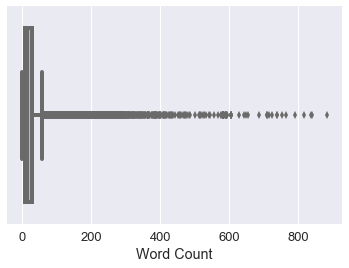

In [270]:
sns.set_style("darkgrid")

wc = cmt_rmO_lm.rename(columns={'word_count': 'Word Count'})
ax = sns.boxplot(x="Word Count", data=wc, palette='Set3', linewidth=4)

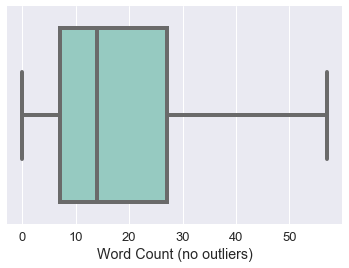

In [269]:
wc = cmt_rmO_lm.rename(columns={'word_count': 'Word Count (no outliers)'})
ax = sns.boxplot(x='Word Count (no outliers)', data=wc, showfliers=False, palette='Set3', linewidth=4)

# Remove Projects in which Comment Count < 3% Backer count

In [236]:
cmt_year_bac = cmt_year[cmt_year.cmt_collaborator!=1]
cmt_year_bac_count = cmt_year_bac.groupby('pid').count().cmt_content.reset_index()
cmt_year_bac_count = cmt_year_bac_count.rename(columns={'cmt_content': 'cmt_year_bac_count'})
cmt_year_bac_count = cmt_year_bac_count.merge(proj_rmO_lm[['pid', 'proj_backer_count','proj_category']], on=['pid'])

cmt_rmO_lm_b03 = cmt_year_bac_count[cmt_year_bac_count.cmt_year_bac_count > cmt_year_bac_count.proj_backer_count*.03]

In [237]:
pid_count(cmt_year_bac, proj_rm_lm, cmt_year_bac_count, cmt_rmO_lm_b03)

10916, 8747, 4379, 2152


In [238]:
describe_table(cmt_rmO_lm_b03)

,proj_category,Mean,Min,Q1,Q2,Q3,Max,Total
0,art,105.724138,54.0,69.00,96.0,135.00,211.0,87
1,comics,235.163462,121.0,149.75,227.0,305.25,466.0,104
2,crafts,95.465517,50.0,61.00,80.5,131.00,202.0,58
3,dance,90.000000,64.0,77.00,90.0,103.00,116.0,2
4,design,477.087045,217.0,283.00,411.5,640.75,1041.0,494
5,fashion,203.397351,104.0,137.50,179.0,253.00,406.0,151
6,film & video,200.034483,87.0,120.50,186.5,261.50,352.0,58
7,food,239.833333,122.0,156.00,212.5,324.25,406.0,48
8,games,670.696649,310.0,426.50,599.0,869.50,1457.0,567
9,journalism,228.333333,107.0,167.50,228.0,289.00,350.0,3


### 21 excluded projects

In [239]:
# non-exist-crt x 7
nec = ['1609868168','312831633','684747507','853442500','1226301798','1081928099','120527637']
# backer only update x 14
bou = ['1590213163','470852862','712421360','2136231521','1642458373','658625855','1877108415',
'1919339875','1058795815','1252004268','351571985','1951098917','780597371','1786680440']

In [240]:
cmt_rmO_lm_b03 = cmt_rmO_lm_b03[~cmt_rmO_lm_b03.pid.isin(nec + bou)]

In [241]:
len(cmt_rmO_lm_b03)

2137

In [242]:
2152-2137

15

In [243]:
# save_db('cmt_rmO_lm_b03', cmt_rmO_lm_b03)